# Weather model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import scipy.stats as stats
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Create a linear regression model using temperature difference as the target variable. Humidity and windspeed are the explanatory variables.

In [4]:
df['temp_diff'] = df['apparenttemperature'] - df['temperature']

explanatory_var = ['humidity', 'windspeed']

# Y is our target variable
Y = df['temp_diff']

# X is our model features
X = df[explanatory_var]

## Estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?

In [5]:
import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              temp_diff   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:58:26   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


R-squared value = .228<br>
Adj. R-squared = .228

Both r-squared values indicate that our model only explains 22.8% of the variance in temperature. This is not satisfactory and a higher R-squared value is more desirable. However, sometimes it is not possible to achieve a higher R-squared value. In this scenario, a value of .228 is relatively satisfactory.

## Include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one?

In [7]:
df['humidity_windspeed_interaction'] = df['humidity']*df['windspeed']

explanatory_var = ['humidity', 'windspeed', 'humidity_windspeed_interaction']

# Y is our target variable
Y = df['temp_diff']

# X is our model features
X = df[explanatory_var]

In [8]:
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              temp_diff   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:16:07   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

R-squared value = .341<br>
Adj. R-squared = .341

Both R-squared values are higher and improve upon our previous model.

## Add visibility as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?

In [9]:
explanatory_var = ['humidity', 'windspeed', 'visibility']

# Y is our target variable
Y = df['temp_diff']

# X is our model features
X = df[explanatory_var]

In [10]:
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              temp_diff   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:31:11   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5756      0.028     56.605      0.0

R-squared value = .304<br>
Adj. R-squared = .303

Both R-squared values are higher and improve upon the first model. However, the  R-squared values do not improve upon out second 'humidity windspeed interaction' model. Therefore, the 'humidity windspeed interaction' model is more useful.

The second model also had the lowest AIC and BIC values. This confirms that the second model is the most useful.

# House prices model

In [24]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [126]:
continuous_features = ['overallqual', 'grlivarea', 'garagecars', 'firstflrsf',
                       'fullbath', 'yearbuilt', 'yearremodadd']

# New Data frame with only features for our model
model_df = pd.DataFrame()

# Adding the continuouse features to our model DataFrame
for col in continuous_features:
    model_df[col] = df[col]
    
# Adding the categorical features and target variable to our model DataFrame
model_df = pd.concat([model_df, pd.get_dummies(df[['neighborhood', 'exterqual', 'kitchenqual', 'garagefinish', 'bsmtqual']], drop_first=True), df['saleprice']], axis=1)

# Initial model

In [127]:
# X is all the features for the model
X = model_df[['overallqual', 'grlivarea', 'garagecars', 'firstflrsf', 'fullbath',
              'yearbuilt', 'yearremodadd', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
              'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
              'neighborhood_Gilbert', 'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
              'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
              'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
              'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
              'neighborhood_Veenker', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'kitchenqual_Fa',
              'kitchenqual_Gd', 'kitchenqual_TA', 'garagefinish_RFn', 'garagefinish_Unf', 'bsmtqual_Fa',
              'bsmtqual_Gd', 'bsmtqual_TA']]

# Y is our target
Y = np.log(model_df['saleprice'])

import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     200.6
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:23:52   Log-Likelihood:                 683.52
No. Observations:                1460   AIC:                            -1281.
Df Residuals:                    1417   BIC:                            -1054.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8442 

#### The adjusted R-squared value is .852.
#### The F-statistic is 200.6
#### The AIC and BIC values are -1281 an -1054 respectively
#### This summary leads me to believe that the model is decent, but there is still room for improvement. Let's see id our model improves if we transform our features to a more normal distribution.

# Second model - with variable transformations
Let's look at the distributions of all the continuous variables in our model

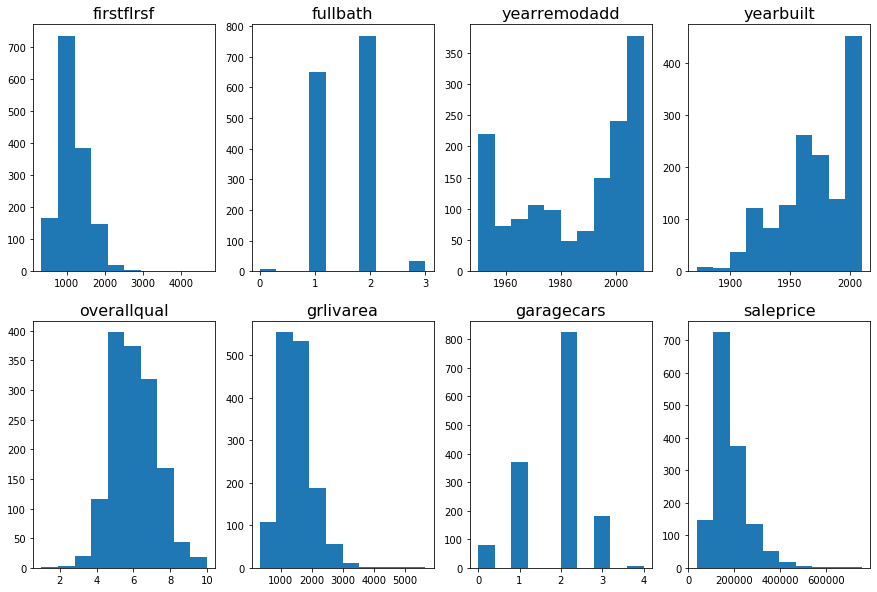

In [45]:
plt.figure(figsize=(15,10))

plt.subplot(2, 4, 1)
plt.hist(df['firstflrsf'])
plt.title('firstflrsf', fontsize=16)

plt.subplot(2, 4, 2)
plt.hist(df['fullbath'])
plt.title('fullbath', fontsize=16)

plt.subplot(2, 4, 3)
plt.hist(df['yearremodadd'])
plt.title('yearremodadd', fontsize=16)

plt.subplot(2, 4, 4)
plt.hist(df['yearbuilt'])
plt.title('yearbuilt', fontsize=16)

plt.subplot(2, 4, 5)
plt.hist(df['overallqual'])
plt.title('overallqual', fontsize=16)

plt.subplot(2, 4, 6)
plt.hist(df['grlivarea'])
plt.title('grlivarea', fontsize=16)

plt.subplot(2, 4, 7)
plt.hist(df['garagecars'])
plt.title('garagecars', fontsize=16)

plt.subplot(2, 4, 8)
plt.hist(df['saleprice'])
plt.title('saleprice', fontsize=16)

plt.show()

Based on the histograms, most of the variables are skewed. We can use log transformations to make some of the variable distributions more normal. The only variables that can be transformed to a normal distribution are firstflrsf, grlivarea, and saleprice. I will transform these features using log transformation.

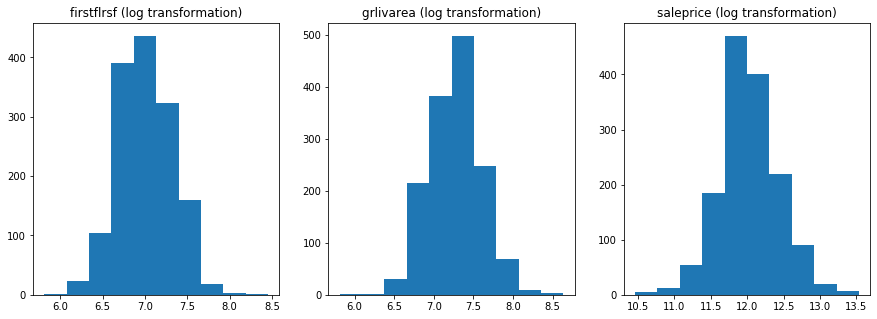

In [131]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(np.log(df['firstflrsf']))
plt.title('firstflrsf (log transformation)', fontsize=12)

plt.subplot(1, 3, 2)
plt.hist(np.log(df['grlivarea']))
plt.title('grlivarea (log transformation)', fontsize=12)

plt.subplot(1, 3, 3)
plt.hist(np.log(df['saleprice']))
plt.title('saleprice (log transformation)', fontsize=12)

plt.show()

#### The features appear to have a much more normal distribution after the log transformation.

In [129]:
# Let's replace the non-normal features in our model with the more normal transformations

model_df['log_grlivarea'] = np.log(df['grlivarea'])
model_df['log_firstflrsf'] = np.log(df['firstflrsf'])
model_df['log_saleprice'] = np.log(model_df['saleprice'])

In [132]:
# X is all the features for the model
X = model_df[['overallqual', 'log_grlivarea', 'garagecars', 'log_firstflrsf', 'fullbath',
              'yearbuilt', 'yearremodadd', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
              'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
              'neighborhood_Gilbert', 'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
              'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
              'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
              'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
              'neighborhood_Veenker', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'kitchenqual_Fa',
              'kitchenqual_Gd', 'kitchenqual_TA', 'garagefinish_RFn', 'garagefinish_Unf', 'bsmtqual_Fa',
              'bsmtqual_Gd', 'bsmtqual_TA']]

# Y is our target
Y = model_df['log_saleprice']

import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_saleprice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sat, 04 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:20:49   Log-Likelihood:                 734.19
No. Observations:                1460   AIC:                            -1382.
Df Residuals:                    1417   BIC:                            -1155.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6049 

#### -The adjusted R-squared value is .862. This is a slight improvement to our first model.
#### -The F-statistic is 217.5. This is a slight improvement to our first model.
#### -The AIC and BIC values are -1382 an -1155 respectively. This is a slight improvement to our first model.
#### -This summary leads me to believe the second model is certainly better than our first model, although only slightly better. This may be because there may not be any more areas for big improvement using linear regression.